## Perspective and Geometric Transformations
 rotation, translation, scaling, skewing, and perspective warping on images.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read the image
image = cv2.imread('stanford.jpg', cv2.IMREAD_GRAYSCALE)

In [7]:
# Define the transformation matrix
# Rotation (30 degrees anticlockwise)
angle = 30
rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
# Translation
translation_matrix = np.float32([[1, 0, 50], [0, 1, 50]])
# Scaling
scaling_matrix = np.float32([[0.5, 0, 0], [0, 0.5, 0]])
# Skewing
skewing_matrix = np.float32([[1, 0.5, 0], [0.5, 1, 0]])

In [8]:
# Perspective transformation
points_before = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
points_after = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
perspective_matrix = cv2.getPerspectiveTransform(points_before, points_after)

In [9]:
# Apply the transformations
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
scaled_image = cv2.warpAffine(image, scaling_matrix, (image.shape[1], image.shape[0]))
skewed_image = cv2.warpAffine(image, skewing_matrix, (image.shape[1], image.shape[0]))
perspective_warped_image = cv2.warpPerspective(image, perspective_matrix, (300, 300))

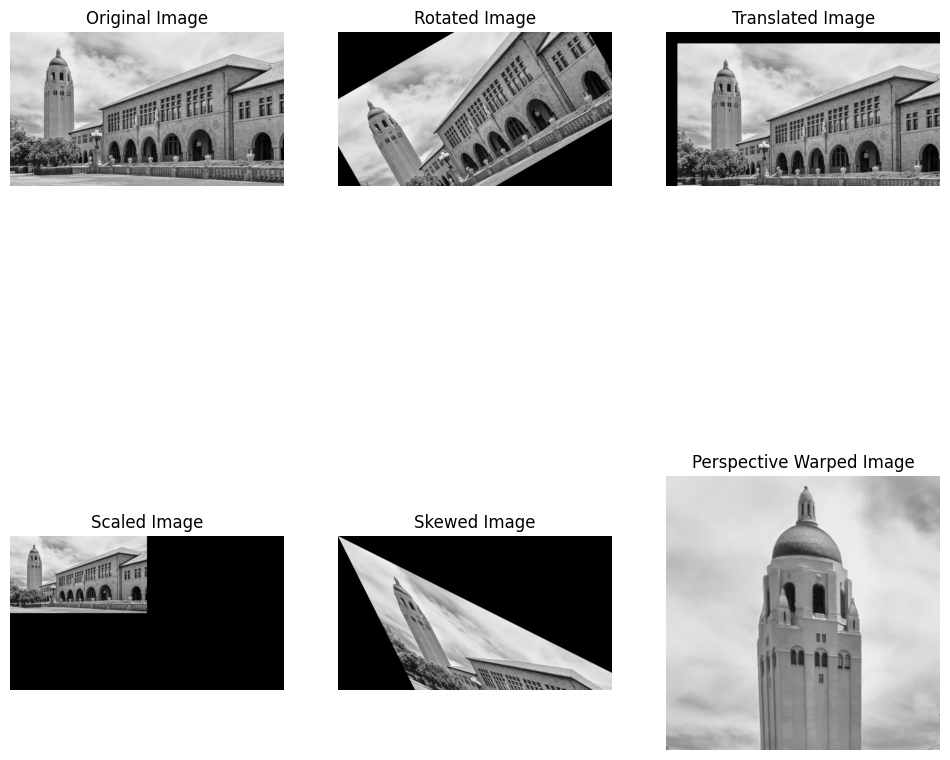

In [10]:
# Display the images using plt.imshow
plt.figure(figsize=(12, 12))

plt.subplot(231)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(232)
plt.title('Rotated Image')
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(233)
plt.title('Translated Image')
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(234)
plt.title('Scaled Image')
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(235)
plt.title('Skewed Image')
plt.imshow(cv2.cvtColor(skewed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(236)
plt.title('Perspective Warped Image')
plt.imshow(cv2.cvtColor(perspective_warped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()